In this script, we combine all the sites from the different reforestation projects from different organization to one dataset and do some initial filtering.

In [2]:
import geopandas as gpd
from shapely.geometry import shape
import json
import pandas as pd
import numpy as np
from shapely import wkt

#### Plant_planet_data


We extracted the data from https://www.plant-for-the-planet.org as described in the script 'Plant_Planet_Meta_Data_preprocessing.ipynb'. Further, we already filtered the data in the script 'Plant_Planet_Meta_Data_preprocessing.ipynb',and upload the shape file generated in this script to the asset section of google earth enginee and then added some metadata to the files as more closely described in 'GEE_columns generation.ipynb' and harmonize the column naming as in the data description section of the paper.

In [19]:

df_plant_2=pd.read_csv("../input/Plant_for_planet_shapefiles/plant_planet.csv",encoding='latin-1')
df_plant_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2367 entries, 0 to 2366
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   project_id_reported       2367 non-null   object 
 1   trees_planted_reported    2352 non-null   float64
 2   country                   2366 non-null   object 
 3   description_reported      2367 non-null   object 
 4   planting_date_reported    1925 non-null   object 
 5   geometry_reported         2367 non-null   object 
 6   survival_rate_reported    1665 non-null   float64
 7   site_sqkm                 2367 non-null   float64
 8   site_id_reported          2367 non-null   object 
 9   host_name                 2367 non-null   object 
 10  url                       2367 non-null   object 
 11  species_count_reported    0 non-null      float64
 12  species_planted_reported  0 non-null      float64
dtypes: float64(5), object(8)
memory usage: 240.5+ KB


In [42]:
df_plant_2["geometry_reported"]

0       POLYGON ((-49.958833158016205 -9.3510733412391...
1       POLYGON Z ((-43.472501 -22.489448 0, -43.47236...
2       POLYGON Z ((-43.462002 -22.477901 0, -43.46583...
3       POLYGON Z ((-43.468334 -22.491903 0, -43.46833...
4       POLYGON Z ((-2.01902187 8.21742549 0, -2.02027...
                              ...                        
2362    POLYGON ((-77.4323577054455 0.125150648849918,...
2363    POLYGON ((-77.8440719418937 -1.805359825758349...
2364    POLYGON ((-77.8446741305385 -1.80719678058946,...
2365    POLYGON ((-77.8481324722818 -1.80571220524683,...
2366    POLYGON ((7.482829391956334 62.70130868559874,...
Name: geometry_reported, Length: 2367, dtype: object

#### Tree_Nation

We extracted and filtered  the data from https://tree-nation.com/projects as described in the script 'Tree_Nation-meta_data_pre.ipynb'.and upload the shape file of the resulting data to the asset section of google earth enginee and then added some metadata to the files as more closely described in 'GEE_columns generation.ipynb' and harmonize the column naming as in the data description section of the paper.

In [22]:
df_nation_2 =pd.read_csv("../input/Tree_Nation_Modified_shape_file/Tree_Nation.csv",encoding='latin-1')
df_nation_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   planting_date_reported    594 non-null    object 
 1   description_reported      591 non-null    object 
 2   site_id_reported          594 non-null    int64  
 3   url                       594 non-null    object 
 4   project_id_reported       594 non-null    int64  
 5   trees_planted_reported    594 non-null    int64  
 6   geometry_reported         594 non-null    object 
 7   site_sqkm                 594 non-null    float64
 8   host_name                 594 non-null    object 
 9   species_count_reported    0 non-null      float64
 10  species_planted_reported  0 non-null      float64
 11  country                   0 non-null      float64
 12  survival_rate_reported    0 non-null      float64
dtypes: float64(5), int64(3), object(5)
memory usage: 60.5+ KB



#### For all others for additional data columns assimilation run the  script GEE_columns_generation.ipynb  with original metadata and ensure all columns naming are consistent

#### Open_Forest_protocol

We extracted and filtered  the data from https://atlas.openforestprotocol.org/  as described in the script  "open_forest_projests_Data_filtering.ipynb" and upload the shape file of the resulting data to the asset section of google earth enginee and then added some metadata to the files as more closely described in 'GEE_columns generation.ipynb' and harmonize the column naming as in the data description section of the paper.

In [24]:
df_atla_new=pd.read_csv("../input/Atlas/atlas_data.csv")
df_atla_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   project_id_reported       112 non-null    int64  
 1   site_id_reported          112 non-null    int64  
 2   description_reported      112 non-null    object 
 3   geometry_reported         112 non-null    object 
 4   site_sqkm                 112 non-null    float64
 5   country                   111 non-null    object 
 6   host_name                 112 non-null    object 
 7   url                       112 non-null    object 
 8   species_count_reported    0 non-null      float64
 9   species_planted_reported  0 non-null      float64
 10  planting_date_reported    0 non-null      float64
 11  survival_rate_reported    0 non-null      float64
 12  trees_planted_reported    0 non-null      float64
dtypes: float64(6), int64(2), object(5)
memory usage: 11.5+ KB


#### TIST data_with_trees_planted

We extracted and filtered  the data from https://registry.verra.org/app/search/VCS as described in the script  "Verra_Data_filtering.ipynb" and upload the shape file of the resulting data to the asset section of google earth enginee and then added some metadata to the files as more closely described in 'GEE_columns generation.ipynb' and harmonize the column naming as in the data description section of the paper

In [13]:
df_tist_2=pd.read_csv("../input/TIST/TIST_Meta.csv",encoding='latin-1')
df_tist_2['host_name'] = 'TIST'
df_tist_2['url'] = 'https://program.tist.org'
df_tist_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11301 entries, 0 to 11300
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   project_id_reported       0 non-null      float64
 1   site_id_reported          11301 non-null  object 
 2   geometry_reported         11300 non-null  object 
 3   planting_date_reported    11056 non-null  object 
 4   trees_planted_reported    11301 non-null  int64  
 5   description_reported      0 non-null      float64
 6   survival_rate_reported    0 non-null      float64
 7   species_count_reported    0 non-null      float64
 8   species_planted_reported  0 non-null      float64
 9   site_sqkm                 11055 non-null  float64
 10  country                   11301 non-null  object 
 11  host_name                 11301 non-null  object 
 12  url                       11301 non-null  object 
dtypes: float64(6), int64(1), object(6)
memory usage: 1.1+ MB


#### TIST data_without_trees_planted

We extracted and filtered  the data from https://registry.verra.org/app/search/VCS as described in the script  "Verra_Data_filtering.ipynb" and upload the shape file of the resulting data to the asset section of google earth enginee and then added some metadata to the files as more closely described in 'GEE_columns generation.ipynb' and harmonize the column naming as in the data description section of the paper

In [14]:
df_tist_w_2=pd.read_csv("../input/TIST/TIST_Meta_without_trees.csv",encoding='latin-1')
df_tist_w_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13016 entries, 0 to 13015
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   project_id_reported       0 non-null      float64
 1   site_id_reported          13016 non-null  object 
 2   geometry_reported         13015 non-null  object 
 3   country                   13016 non-null  object 
 4   site_sqkm                 0 non-null      float64
 5   description_reported      0 non-null      float64
 6   planting_date_reported    0 non-null      float64
 7   trees_planted_reported    0 non-null      float64
 8   survival_rate_reported    0 non-null      float64
 9   species_count_reported    0 non-null      float64
 10  species_planted_reported  0 non-null      float64
dtypes: float64(8), object(3)
memory usage: 1.1+ MB


In [15]:
df_tist_w_2['host_name'] = 'TIST'
df_tist_w_2['url'] = 'https://program.tist.org'
df_tist_w_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13016 entries, 0 to 13015
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   project_id_reported       0 non-null      float64
 1   site_id_reported          13016 non-null  object 
 2   geometry_reported         13015 non-null  object 
 3   country                   13016 non-null  object 
 4   site_sqkm                 0 non-null      float64
 5   description_reported      0 non-null      float64
 6   planting_date_reported    0 non-null      float64
 7   trees_planted_reported    0 non-null      float64
 8   survival_rate_reported    0 non-null      float64
 9   species_count_reported    0 non-null      float64
 10  species_planted_reported  0 non-null      float64
 11  host_name                 13016 non-null  object 
 12  url                       13016 non-null  object 
dtypes: float64(8), object(5)
memory usage: 1.3+ MB


#### ASIA_VERRA

We extracted and filtered  the data from https://registry.verra.org/app/search/VCS as described in the script  "Verra_Data_filtering.ipynb" and upload the shape file of the resulting data to the asset section of google earth enginee and then added some metadata to the files as more closely described in 'GEE_columns generation.ipynb' and harmonize the column naming as in the data description section of the paper

In [9]:
df_asia_2=pd.read_csv("../input/Verra/Asia.csv",encoding='latin-1')
df_asia_2['host_name'] = 'VCS'
df_asia_2['url'] = 'https://registry.verra.org/app/search/VCS'
df_asia_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43628 entries, 0 to 43627
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   site_id_reported          0 non-null      float64
 1   project_id_reported       0 non-null      float64
 2   geometry_reported         43611 non-null  object 
 3   description_reported      0 non-null      float64
 4   planting_date_reported    0 non-null      float64
 5   trees_planted_reported    0 non-null      float64
 6   survival_rate_reported    0 non-null      float64
 7   species_count_reported    0 non-null      float64
 8   species_planted_reported  0 non-null      float64
 9   country                   43610 non-null  object 
 10  site_sqkm                 43628 non-null  float64
 11  host_name                 43628 non-null  object 
 12  url                       43628 non-null  object 
dtypes: float64(9), object(4)
memory usage: 4.3+ MB


#### VERRA Latin America

We extracted and filtered  the data from https://registry.verra.org/app/search/VCS as described in the script  "Verra_Data_filtering.ipynb" and upload the shape file of the resulting data to the asset section of google earth enginee and then added some metadata to the files as more closely described in 'GEE_columns generation.ipynb' and harmonize the column naming as in the data description section of the paper

In [7]:
df_latin_2=pd.read_csv("../input/Verra/latin.csv",encoding='latin-1')
df_latin_2['host_name'] = 'VCS'
df_latin_2['url'] = 'https://registry.verra.org/app/search/VCS'
df_latin_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   geometry_reported         407 non-null    object 
 1   site_id_reported          0 non-null      float64
 2   project_id_reported       0 non-null      float64
 3   description_reported      0 non-null      float64
 4   planting_date_reported    0 non-null      float64
 5   trees_planted_reported    0 non-null      float64
 6   survival_rate_reported    0 non-null      float64
 7   species_count_reported    0 non-null      float64
 8   species_planted_reported  0 non-null      float64
 9   country                   407 non-null    object 
 10  site_sqkm                 407 non-null    float64
 11  host_name                 407 non-null    object 
 12  url                       407 non-null    object 
dtypes: float64(9), object(4)
memory usage: 41.5+ KB


#### TIST other areas projects

We extracted and filtered  the data from https://registry.verra.org/app/search/VCS as described in the script  "Verra_Data_filtering.ipynb" and upload the shape file of the resulting data to the asset section of google earth enginee and then added some metadata to the files as more closely described in 'GEE_columns generation.ipynb' and harmonize the column naming as in the data description section of the paper

In [4]:
df_other_2=pd.read_csv("../input/Verra/OTHER_verra_projects.csv",encoding='latin-1')
df_other_2['host_name'] = 'VCS'
df_other_2['url'] = 'https://registry.verra.org/app/search/VCS'
df_other_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   geometry_reported         270 non-null    object 
 1   site_id_reported          270 non-null    int64  
 2   species_planted_reported  270 non-null    object 
 3   planting_date_reported    270 non-null    object 
 4   project_id_reported       0 non-null      float64
 5   description_reported      0 non-null      float64
 6   trees_planted_reported    0 non-null      float64
 7   survival_rate_reported    0 non-null      float64
 8   species_count_reported    0 non-null      float64
 9   site_sqkm                 270 non-null    float64
 10  country                   270 non-null    object 
 11  host_name                 270 non-null    object 
 12  url                       270 non-null    object 
dtypes: float64(6), int64(1), object(6)
memory usage: 27.5+ KB


#### Restor eco data

We extracted and filtered  the data from  https://restor.eco/?lat=10.743821093825016&lng=4.473759981496621&zoom=4 as described in the script  "restor.ipynb" and upload the shape file of the resulting data to the asset section of google earth enginee and then added some metadata to the files as more closely described in 'GEE_columns generation.ipynb' and harmonize the column naming as in the data description section of the paper

In [27]:
df_eco_2=pd.read_csv("../input/Restor_Eco/restor_eco.csv",encoding='latin-1')
df_eco_2 ['host_name'] = 'Restor Eco'
df_eco_2['url'] = 'https://restor.eco/?lat=26&lng=14.23&zoom=3'
df_eco_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   project_id_reported       1540 non-null   object 
 1   description_reported      1540 non-null   object 
 2   planting_date_reported    1540 non-null   object 
 3   geometry_reported         1540 non-null   object 
 4   url                       1540 non-null   object 
 5   site_sqkm                 1540 non-null   object 
 6   country                   1540 non-null   object 
 7   site_id_reported          1540 non-null   object 
 8   species_count_reported    0 non-null      float64
 9   species_planted_reported  0 non-null      float64
 10  survival_rate_reported    0 non-null      float64
 11  trees_planted_reported    0 non-null      float64
 12  host_name                 1540 non-null   object 
dtypes: float64(4), object(9)
memory usage: 156.5+ KB


#### Explorer Data

This data is extracted from te we forest projects website https://explorer.land/x/projects,the column names were manually edited

In [28]:
df_ex=pd.read_csv("../input/ExplorerLand/explorer_land.csv")
df_ex['host_name'] = 'Explorer Land'
df_ex['url'] = 'https://explorer.land/x/projects'
df_ex.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   project_id_reported       0 non-null      float64
 1   country                   0 non-null      float64
 2   planting_date_reported    20 non-null     float64
 3   species_count_reported    0 non-null      float64
 4   species_planted_reported  0 non-null      float64
 5   survival_rate_reported    0 non-null      float64
 6   site_sqkm                 11 non-null     float64
 7   trees_planted_reported    19 non-null     float64
 8   site_id_reported          21 non-null     object 
 9   geometry_reported         21 non-null     object 
 10  description_reported      21 non-null     object 
 11  host_name                 21 non-null     object 
 12  url                       21 non-null     object 
dtypes: float64(8), object(5)
memory usage: 2.3+ KB


In [29]:
df_ex.head(5)

,project_id_reported,country,planting_date_reported,species_count_reported,species_planted_reported,survival_rate_reported,site_sqkm,trees_planted_reported,site_id_reported,geometry_reported,description_reported,host_name,url
0,NaN,NaN,2020.0,NaN,NaN,NaN,0.0044,9000.0,w54el3pdqr439zna,"{'type': 'MultiPolygon', 'coordinates': [[[[19...","In 2020, 9,000 trees were planted on Site J by...",Explorer Land,https://explorer.land/x/projects
1,NaN,NaN,2019.0,NaN,NaN,NaN,0.0026,12000.0,6b4q7jellm4yn8xd,"{'type': 'MultiPolygon', 'coordinates': [[[[19...","In 2019, 9,800 trees were planted on Site I, a...",Explorer Land,https://explorer.land/x/projects
2,NaN,NaN,2015.0,NaN,NaN,NaN,NaN,8001.0,wzgbdynmmxnjkae0,"{'type': 'MultiPolygon', 'coordinates': [[[[19...","In 2015, 8,001 trees were planted on Site E, a...",Explorer Land,https://explorer.land/x/projects
3,NaN,NaN,2023.0,NaN,NaN,NaN,NaN,2700.0,lmedq3q7ebry97va,"{'type': 'MultiPolygon', 'coordinates': [[[[19...",The restoration approach implemented at the Bl...,Explorer Land,https://explorer.land/x/projects
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,q4d7myrlv4lya6kz,"{'type': 'MultiPolygon', 'coordinates': [[[[19...",In order to protect the old-growth forest from...,Explorer Land,https://explorer.land/x/projects


We extracted  the data from  https://facethefuture.com/#projects described in the script 'Face_Future_metadata_prepro.ipynb'. Further, we already filtered the data in the script 'Face_Future_metadata_prepro.ipynb',and upload the shape file generated in this script to the asset section of google earth enginee and then added some metadata to the files as more closely described in 'GEE_columns generation.ipynb' and harmonize the column naming as in the data description section of the paper.

In [30]:
df_ftf_2=pd.read_csv("../input/FaceTheFuture/face_the_future.csv",encoding='latin-1')
df_ftf_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   project_id_reported       74 non-null     object 
 1   site_id_reported          396 non-null    int64  
 2   trees_planted_reported    74 non-null     float64
 3   site_sqkm                 74 non-null     float64
 4   planting_date_reported    74 non-null     float64
 5   description_reported      1 non-null      object 
 6   host_name                 74 non-null     object 
 7   geometry_reported         396 non-null    object 
 8   url                       396 non-null    object 
 9   species_count_reported    0 non-null      float64
 10  country                   0 non-null      float64
 11  species_planted_reported  0 non-null      float64
 12  survival_rate_reported    0 non-null      float64
dtypes: float64(7), int64(1), object(5)
memory usage: 40.3+ KB


### Verra_Aggregated

We extracted  the data from  https://registry.verra.org/app/search/CCB and upload the shape file of the resulting data to the asset section of google earth enginee and then added some metadata to the files as more closely described in 'GEE_columns generation.ipynb' and harmonize the column naming as in the data description section of the paper

In [51]:
df_verra=pd.read_csv("../input/Verra/verra_aggregaated.csv")
df_verra['host_name'] = 'Verra'
df_verra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783984 entries, 0 to 783983
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   site_sqkm                 783984 non-null  float64
 1   description_reported      783984 non-null  object 
 2   project_id_reported       783984 non-null  int64  
 3   site_id_reported          783984 non-null  int64  
 4   species_count_reported    0 non-null       float64
 5   species_planted_reported  0 non-null       float64
 6   survival_rate_reported    0 non-null       float64
 7   trees_planted_reported    0 non-null       float64
 8   geometry_reported         783984 non-null  object 
 9   country                   779044 non-null  object 
 10  planting_date_reported    778492 non-null  object 
 11  url                       783984 non-null  object 
 12  host_name                 783984 non-null  object 
dtypes: float64(5), int64(2), object(6)
memory us

In [52]:
df_verra.describe()

,site_sqkm,project_id_reported,site_id_reported,species_count_reported,species_planted_reported,survival_rate_reported,trees_planted_reported
count,783984.000000,783984.000000,783984.000000,0.0,0.0,0.0,0.0
mean,0.222344,2848.453958,25598.638387,NaN,NaN,NaN,NaN
std,8.270252,871.056926,34038.048453,NaN,NaN,NaN,NaN
min,0.000000,142.000000,0.000000,NaN,NaN,NaN,NaN
25%,0.001207,2391.000000,2172.000000,NaN,NaN,NaN,NaN
50%,0.003417,2418.000000,9192.500000,NaN,NaN,NaN,NaN
75%,0.014464,3336.000000,35172.000000,NaN,NaN,NaN,NaN
max,994.223626,5142.000000,131612.000000,NaN,NaN,NaN,NaN


In [53]:

df_verra['site_sqkm'] = pd.to_numeric(df_verra['site_sqkm'], errors='coerce')


df_verra['site_sqkm'] = df_verra['site_sqkm'].fillna(0)


total = df_verra['site_sqkm'].sum()
print(total)

174314.04190310527


### Combining the datasets

In [54]:
dfs = [df_plant_2,df_nation_2,df_tist_2,df_tist_w_2,df_asia_2,df_other_2,df_atla_new,df_eco_2,df_ftf_2,df_verra,df_ex,df_latin_2] 

In [55]:

reference_order = dfs[0].columns.tolist()
reordered_dfs = [df[reference_order] for df in dfs]

In [56]:
df_reforestation= pd.concat(reordered_dfs, ignore_index=True)
df_reforestation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857636 entries, 0 to 857635
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   project_id_reported       788671 non-null  object 
 1   trees_planted_reported    14340 non-null   float64
 2   country                   851665 non-null  object 
 3   description_reported      788616 non-null  object 
 4   planting_date_reported    793971 non-null  object 
 5   geometry_reported         857617 non-null  object 
 6   survival_rate_reported    1665 non-null    float64
 7   site_sqkm                 844042 non-null  object 
 8   site_id_reported          813601 non-null  object 
 9   host_name                 857314 non-null  object 
 10  url                       857636 non-null  object 
 11  species_count_reported    0 non-null       float64
 12  species_planted_reported  270 non-null     object 
dtypes: float64(3), object(10)
memory usage: 85.1

### Filtering only polygon/Multipolygon rows

In [57]:


def is_polygon_or_multipolygon(geometry):
    if not isinstance(geometry, str):
        return False
    
    
    try:
        geometry_dict = json.loads(geometry)
        if isinstance(geometry_dict, dict) and 'type' in geometry_dict:
            return geometry_dict['type'] in ['Polygon', 'MultiPolygon']
    except json.JSONDecodeError:
        pass
    
   
    try:
        geom = wkt.loads(geometry)
        return geom.geom_type in ['Polygon', 'MultiPolygon']
    except Exception:
        return False

df_reforestation = df_reforestation[df_reforestation['geometry_reported'].apply(is_polygon_or_multipolygon)]

df_reforestation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817553 entries, 0 to 857207
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   project_id_reported       762372 non-null  object 
 1   trees_planted_reported    14246 non-null   float64
 2   country                   812162 non-null  object 
 3   description_reported      762369 non-null  object 
 4   planting_date_reported    767928 non-null  object 
 5   geometry_reported         817553 non-null  object 
 6   survival_rate_reported    1665 non-null    float64
 7   site_sqkm                 817307 non-null  object 
 8   site_id_reported          773942 non-null  object 
 9   host_name                 817553 non-null  object 
 10  url                       817553 non-null  object 
 11  species_count_reported    0 non-null       float64
 12  species_planted_reported  270 non-null     object 
dtypes: float64(3), object(10)
memory usage: 87.3+ MB


### Filtering only polygons less than 10000kmsq

In [58]:


def parse_geometry(geometry):
    if pd.isnull(geometry):
        return None
    try:
        # Try to parse as JSON
        return shape(json.loads(geometry))
    except json.JSONDecodeError:
        # If JSON parsing fails, try to parse as WKT
        try:
            return wkt.loads(geometry)
        except Exception:
            return None

df_reforestation['geometry'] = df_reforestation['geometry_reported'].apply(parse_geometry)

gdf = gpd.GeoDataFrame(df_reforestation, geometry='geometry')

gdf.crs = "EPSG:4326"

gdf = gdf.to_crs(epsg=3395)

gdf.loc[gdf['site_sqkm'].isnull(), 'site_sqkm'] = gdf['geometry'].area / 1e6

In [59]:



gdf['site_sqkm'] = pd.to_numeric(gdf['site_sqkm'], errors='coerce')


gdf_filtered = gdf[gdf['site_sqkm'] < 10000]
gdf_filtered.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 817548 entries, 0 to 857207
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   project_id_reported       762367 non-null  object  
 1   trees_planted_reported    14242 non-null   float64 
 2   country                   812159 non-null  object  
 3   description_reported      762364 non-null  object  
 4   planting_date_reported    767925 non-null  object  
 5   geometry_reported         817548 non-null  object  
 6   survival_rate_reported    1664 non-null    float64 
 7   site_sqkm                 817548 non-null  float64 
 8   site_id_reported          773937 non-null  object  
 9   host_name                 817548 non-null  object  
 10  url                       817548 non-null  object  
 11  species_count_reported    0 non-null       float64 
 12  species_planted_reported  270 non-null     object  
 13  geometry                  

### Dropping duplicates

In [60]:
gdf_filtered.drop_duplicates('geometry_reported', inplace = True)

C:\Users\Angela\AppData\Local\Temp\ipykernel_17744\1712958370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_filtered.drop_duplicates('geometry_reported', inplace = True)


In [61]:
gdf_filtered.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 801584 entries, 0 to 857207
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   project_id_reported       747088 non-null  object  
 1   trees_planted_reported    13555 non-null   float64 
 2   country                   796196 non-null  object  
 3   description_reported      747085 non-null  object  
 4   planting_date_reported    752072 non-null  object  
 5   geometry_reported         801584 non-null  object  
 6   survival_rate_reported    1631 non-null    float64 
 7   site_sqkm                 801584 non-null  float64 
 8   site_id_reported          758014 non-null  object  
 9   host_name                 801584 non-null  object  
 10  url                       801584 non-null  object  
 11  species_count_reported    0 non-null       float64 
 12  species_planted_reported  270 non-null     object  
 13  geometry                  

#### Creating unique site and projects Ids

In [62]:

gdf_filtered['created_site_ids'] = ['reforest_site_{}'.format(i) for i in range(1, len(gdf_filtered) + 1)]


unique_project_ids = gdf_filtered['project_id_reported'].unique()
project_id_mapping = {id: 'reforest_proj_{}'.format(i) for i, id in enumerate(unique_project_ids, 1)}


gdf_filtered['created_project_ids'] = gdf_filtered['project_id_reported'].map(project_id_mapping)

c:\Users\Angela\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\Angela\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [65]:
gdf_filtered.describe()

,trees_planted_reported,survival_rate_reported,site_sqkm,species_count_reported
count,1.355500e+04,1631.000000,801584.000000,0.0
mean,3.452890e+05,90.914776,0.379916,NaN
std,2.172923e+06,7.317982,30.337182,NaN
min,0.000000e+00,50.000000,0.000000,NaN
25%,4.400000e+01,90.000000,0.001354,NaN
50%,1.140000e+02,90.000000,0.004025,NaN
75%,5.965000e+02,98.000000,0.017668,NaN
max,3.000000e+07,100.000000,9324.947852,NaN


In [ ]:
#Saving The  data to csv
gdf_filtered.to_csv('"../input/consolidated_reforestation_projects.csv"', index=False)

## After Generating extra columns with  either Feature_collection_direct__GEE_columns_generation.ipynb or Feature_collection_GEE_columns_generation.ipynb

In [46]:
import json


gdf_dict = json.loads(gdf_filtered.to_json())


for feature, row in zip(gdf_dict['features'], gdf_filtered.itertuples()):
    if 'properties' in feature:
        feature['properties']['Top_Three_NDVI_Months'] = row.Top_Three_NDVI_Months


geojson_str = json.dumps(gdf_dict)


with open("../input/df_reforestation.geojson", "w") as file:
    file.write(geojson_str)

In [47]:
gdf_filtered.to_file("../input/df_reforestation.gpkg", driver="GPKG")

In [107]:
projects = gpd.read_file('df_reforestation.geojson')
projects.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 783316 entries, 0 to 783315
Data columns (total 33 columns):
 #   Column                            Non-Null Count   Dtype   
---  ------                            --------------   -----   
 0   id                                783316 non-null  object  
 1   country                           778081 non-null  object  
 2   description_reported              2447 non-null    object  
 3   host_name                         783316 non-null  object  
 4   planting_date_reported            749563 non-null  object  
 5   project_id_reported               781982 non-null  object  
 6   site_id_reported                  782891 non-null  object  
 7   site_sqkm                         783316 non-null  float64 
 8   survival_rate_reported            509 non-null     float64 
 9   trees_planted_reported            9904 non-null    float64 
 10  url                               783316 non-null  object  
 11  geometry_reported              

/tmp/ipykernel_3895178/366046878.py:9: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



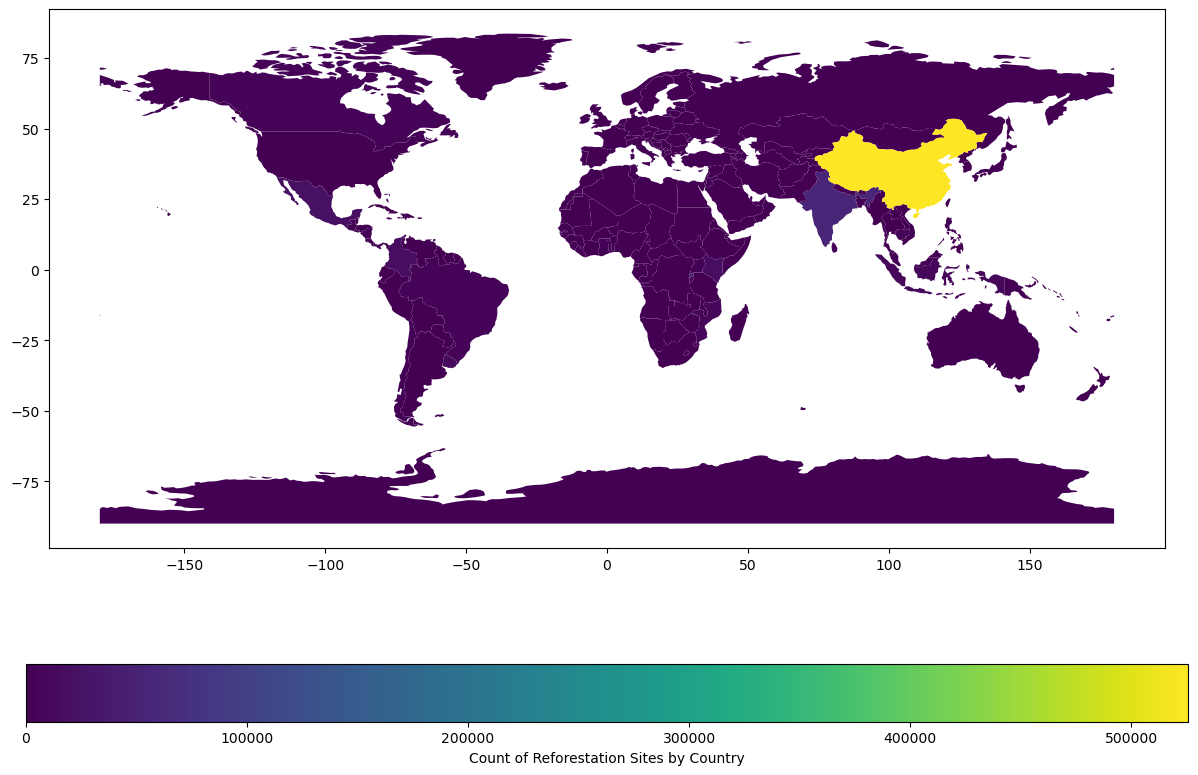

In [47]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

df_reforestation=gdf_filtered

country_counts = df_reforestation.groupby('country').size().reset_index(name='counts')

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


world_with_counts = world.merge(country_counts, how="left", left_on="name", right_on="country")


world_with_counts['counts'] = world_with_counts['counts'].fillna(0)


fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world_with_counts.plot(column='counts', ax=ax, legend=True,
                       legend_kwds={'label': "Count of Reforestation Sites by Country",
                                    'orientation': "horizontal"},
                       missing_kwds={"color": "lightgrey", "label": "No data"})
plt.show()

In [49]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import shape
import plotly.express as px
import json

def convert_to_geometry(geojson_input):
    if geojson_input == '{}' or geojson_input is None:
        return None
    try:
        if isinstance(geojson_input, dict): 
            return shape(geojson_input)
        else:
            geojson_obj = json.loads(geojson_input) 
            return shape(geojson_obj)
    except (json.JSONDecodeError, TypeError):
        return None

df_reforestation['geometry'] = df_reforestation['geometry_reported'].apply(convert_to_geometry)
gdf_sites = gpd.GeoDataFrame(df_reforestation, geometry='geometry')




world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


gdf_sites_with_country = gpd.sjoin(gdf_sites, world, how="left", op='intersects')


country_counts_from_sites = gdf_sites_with_country.groupby('name').size().reset_index(name='counts')


country_counts = country_counts.merge(country_counts_from_sites, how="outer", left_on="country", right_on="name")
country_counts['counts'] = country_counts[['counts_x', 'counts_y']].sum(axis=1)
country_counts.drop(['counts_x', 'counts_y', 'name'], axis=1, inplace=True)

world_with_counts = world.merge(country_counts, how="left", left_on="name", right_on="country")


world_with_counts['counts'] = world_with_counts['counts'].fillna(0)


fig = px.choropleth(world_with_counts,
                    locations="iso_a3",
                    color="counts",
                    hover_name="name",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Global Reforestation Sites Count")

fig.show()

/home/idisc02/anaconda3/envs/downgrade/lib/python3.8/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_3895178/1140396345.py:25: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

/home/idisc02/anaconda3/envs/downgrade/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3445: FutureWarning:

The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.

/tmp/ipykernel_3895178/1140396345.py:28: UserWarning:

CRS mismatch between the CRS of left geometries an

In [96]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


fig = make_subplots(
    rows=1, cols=2,
    column_widths=[0.7, 0.3],
    specs=[[{"type": "choropleth"}, {"type": "table"}]]
)


fig.add_trace(
    go.Choropleth(
        locations=world_with_counts['iso_a3'],
        z=world_with_counts['counts'],
        hoverinfo="location+name+z",
        colorscale=px.colors.sequential.Plasma,
        colorbar_title="Site Counts"
    ),
    row=1, col=1
)


table_data = world_with_counts[['name', 'counts']].sort_values(by='counts', ascending=False)


fig.add_trace(
    go.Table(
        header=dict(values=["Country", "Counts"],
                    fill_color='paleturquoise',
                    align='left'),
        cells=dict(values=[table_data.name, table_data.counts],
                   fill_color='lavender',
                   align='left')
    ),
    row=1, col=2
)


fig.update_layout(
    title_text="Global Reforestation Sites Count with Table",
    width=1200,
    height=600
)


fig.show()

In [99]:

gdf_sites_with_country['site_count'] = 1  
country_site_count = gdf_sites_with_country.groupby('name')['site_count'].sum().reset_index(name='total_sites')


world_with_site_count = world.merge(country_site_count, how="left", left_on="name", right_on="name")
world_with_site_count['total_sites'] = world_with_site_count['total_sites'].fillna(0).astype(int)



fig = make_subplots(rows=1, cols=2, column_widths=[0.8, 0.2], specs=[[{"type": "choropleth"}, {"type": "table"}]])

world_with_site_count['hover_text'] = world_with_site_count['name'] + '<br>Total Sites: ' + world_with_site_count['total_sites'].astype(str)


fig.add_trace(
    go.Choropleth(
        locations=world_with_site_count['iso_a3'],
        z=world_with_site_count['total_sites'],
        hoverinfo='text',  
        text=world_with_site_count['hover_text'], 
        colorscale=px.colors.sequential.Plasma,
        colorbar_title="Total Sites",
    ),
    row=1, col=1
)


table_data = world_with_site_count[['name', 'total_sites']].sort_values(by='total_sites', ascending=False)

header_color = 'rgb(12, 7, 134)'  
cell_color = 'rgb(240, 249, 33)' 


fig.add_trace(
    go.Table(
        header=dict(values=["Country", "Total Sites"],
                    fill_color=header_color,  
                    font=dict(color='white'),
                    align='left'),
        cells=dict(values=[table_data.name, table_data.total_sites],
                   fill_color=cell_color, 
                   align='left')),
    row=1, col=2
)


fig.update_layout(
    title_text="Global Reforestation Sites Count",
    showlegend=False,
    paper_bgcolor="lightgrey",
    title_x=0.5,
    width=1200,
    height=600,
    margin=dict(l=10, r=10, t=50, b=10)
)


fig.show()

In [100]:

dark_green_scale = [
    [0, '#a1d99b'],  
    [0.5, '#238b45'],  
    [1, '#00441b']  
]

fig.add_trace(
    go.Choropleth(
        locations=world_with_site_count['iso_a3'],
        z=world_with_site_count['total_sites'],
        hoverinfo='text',  
        text=world_with_site_count['hover_text'], 
        colorscale=dark_green_scale,  
        colorbar_title="Total Sites",
    ),
    row=1, col=1
)


header_color = '#238b45'  
cell_color = '#a1d99b'  

fig.add_trace(
    go.Table(
        header=dict(values=["Country", "Total Sites"],
                    fill_color=header_color, 
                    font=dict(color='white'),
                    align='left'),
        cells=dict(values=[table_data.name, table_data.total_sites],
                   fill_color=cell_color,  
                   align='left')),
    row=1, col=2
)


fig.update_layout(
    title_text="Global Reforestation Sites Count",
    showlegend=False,
    paper_bgcolor="lightgrey",
    title_x=0.5,
    width=1200,
    height=600,
    margin=dict(l=10, r=10, t=50, b=10)
)

fig.show()

In [73]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import shape
import plotly.express as px
import json

def convert_to_geometry(geojson_input):
    if geojson_input == '{}' or geojson_input is None:
        return None
    try:
        if isinstance(geojson_input, dict):  
            return shape(geojson_input)
        else:
            geojson_obj = json.loads(geojson_input)  
            return shape(geojson_obj)
    except (json.JSONDecodeError, TypeError):
        return None


df_reforestation['geometry'] = df_reforestation['geometry_reported'].apply(convert_to_geometry)
gdf_sites = gpd.GeoDataFrame(df_reforestation, geometry='geometry')


gdf_sites.crs = "EPSG:4326"

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


gdf_sites_with_country = gpd.sjoin(gdf_sites, world, how="left", predicate='intersects')


gdf_sites_with_country['area_km2'] = gdf_sites_with_country.to_crs(epsg=3395).area / 10**6


country_area_covered = gdf_sites_with_country.groupby('name')['area_km2'].sum().reset_index(name='total_area_km2')

world_with_area_covered = world.merge(country_area_covered, how="left", left_on="name", right_on="name")


world_with_area_covered['total_area_km2'] = world_with_area_covered['total_area_km2'].fillna(0)


dark_green_scale = [
    [0, '#a1d99b'],  
    [0.5, '#238b45'],  
    [1, '#00441b']  
]

fig = px.choropleth(world_with_area_covered,
                    locations="iso_a3",
                    color="total_area_km2",
                    hover_name="name",
                    color_continuous_scale=dark_green_scale,  # Use the custom dark green scale
                    title="Global Reforestation Area Covered (km²)")

fig.show()

/home/idisc02/anaconda3/envs/downgrade/lib/python3.8/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_3895178/1581334087.py:26: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



In [91]:

world_with_area_covered['total_area_km2'] = world_with_area_covered['total_area_km2'].round(3)


fig = make_subplots(rows=1, cols=2, column_widths=[0.8, 0.2], specs=[[{"type": "choropleth"}, {"type": "table"}]])


world_with_area_covered['hover_text'] = world_with_area_covered['name'] + '<br>Total Area: ' + world_with_area_covered['total_area_km2'].astype(str) + ' km²'

fig.add_trace(
    go.Choropleth(
        locations=world_with_area_covered['iso_a3'],
        z=world_with_area_covered['total_area_km2'],
        hoverinfo='text',  
        text=world_with_area_covered['hover_text'], 
        colorscale=dark_green_scale,
        colorbar_title="Total Area<br>km²",
    ),
    row=1, col=1
)

table_data = world_with_area_covered[['name', 'total_area_km2']].sort_values(by='total_area_km2', ascending=False)
fig.add_trace(
    go.Table(
        header=dict(values=["Country", "Total Area Covered (km²)"],
                    fill_color='darkgreen',  
                    font=dict(color='white'),
                    align='left'),
        cells=dict(values=[table_data.name, table_data.total_area_km2],
                   fill_color='palegreen',  
                   align='left')),
    row=1, col=2
)


fig.update_layout(
    title_text="Global Reforestation Area Covered (km²) with Data Table",
    showlegend=False,
    paper_bgcolor="lightgrey",
    title_x=0.5,
    width=1200,
    height=600,
    margin=dict(l=10, r=10, t=50, b=10)
)

fig.show()

In [89]:

world_with_area_covered['total_area_km2'] = world_with_area_covered['total_area_km2'].round(3)


fig = make_subplots(rows=1, cols=2, column_widths=[0.8, 0.2], specs=[[{"type": "choropleth"}, {"type": "table"}]])


world_with_area_covered['hover_text'] = world_with_area_covered['name'] + '<br>Total Area: ' + world_with_area_covered['total_area_km2'].astype(str) + ' km²'

fig.add_trace(
    go.Choropleth(
        locations=world_with_area_covered['iso_a3'],
        z=world_with_area_covered['total_area_km2'],
        hoverinfo='text',
        text=world_with_area_covered['hover_text'], 
        colorscale=px.colors.sequential.Viridis,
        colorbar_title="Total Area<br>km²",
    ),
    row=1, col=1
)


table_data = world_with_area_covered[['name', 'total_area_km2']].sort_values(by='total_area_km2', ascending=False)
fig.add_trace(
    go.Table(
        header=dict(values=["Country", "Total Area Covered (km²)"],
                    fill_color='#440154', 
                    font=dict(color='white'),
                    align='left'),
        cells=dict(values=[table_data.name, table_data.total_area_km2],
                   fill_color='#b8de29',  
                   align='left')),
    row=1, col=2
)

fig.update_layout(
    title_text="Global Reforestation Area Covered (km²) with Data Table",
    showlegend=False,
    paper_bgcolor="lightgrey",
    title_x=0.5,
    width=1200,
    height=600,
    margin=dict(l=10, r=10, t=50, b=10)
)

fig.show()

In [93]:

world_with_area_covered['total_area_km2'] = world_with_area_covered['total_area_km2'].round(3)

fig = make_subplots(rows=1, cols=2, column_widths=[0.8, 0.2], specs=[[{"type": "choropleth"}, {"type": "table"}]])


world_with_area_covered['hover_text'] = world_with_area_covered['name'] + '<br>Total Area: ' + world_with_area_covered['total_area_km2'].astype(str) + ' km²'

fig.add_trace(
    go.Choropleth(
        locations=world_with_area_covered['iso_a3'],
        z=world_with_area_covered['total_area_km2'],
        hoverinfo='text',
        text=world_with_area_covered['hover_text'], 
        colorscale=px.colors.sequential.Agsunset,
        colorbar_title="Total Area<br>km²",
    ),
    row=1, col=1
)


table_data = world_with_area_covered[['name', 'total_area_km2']].sort_values(by='total_area_km2', ascending=False)


def map_value_to_color(value, min_value, max_value, colorscale):
    normalized = (value - min_value) / (max_value - min_value)
    index = min(int(normalized * (len(colorscale) - 1)), len(colorscale) - 1)
    return colorscale[index]


min_area = table_data['total_area_km2'].min()
max_area = table_data['total_area_km2'].max()


colorscale = px.colors.sequential.Agsunset


row_colors = [map_value_to_color(value, min_area, max_area, colorscale) for value in table_data['total_area_km2']]

fig.add_trace(
    go.Table(
        header=dict(values=["Country", "Total Area Covered (km²)"],
                    fill_color='#440154', 
                    font=dict(color='white'),
                    align='left'),
        cells=dict(values=[table_data.name, table_data.total_area_km2],
                   fill_color=row_colors,  
                   align='left')),
    row=1, col=2
)


fig.update_layout(
    title_text="Global Reforestation Area Covered (km²) with Data Table",
    showlegend=False,
    paper_bgcolor="lightgrey",
    title_x=0.5,
    width=1200,
    height=600,
    margin=dict(l=10, r=10, t=50, b=10)
)


fig.show()

In [64]:
fig = make_subplots(rows=1, cols=2, column_widths=[0.8, 0.2], 
                    specs=[[{"type": "choropleth"}, {"type": "table"}]])

fig.add_trace(
    px.choropleth(world_with_area_covered,
                  locations="iso_a3",
                  color="total_area_km2",
                  hover_name="name",
                  color_continuous_scale=px.colors.sequential.Agsunset).data[0],  
    row=1, col=1
)

table_data = world_with_area_covered[['name', 'total_area_km2']].sort_values(by='total_area_km2', ascending=False)

fig.add_trace(
    go.Table(
        header=dict(values=["Country", "Total Area Covered (km²)"],
                    fill_color='darkblue',  
                    font=dict(color='white'), 
                    align='left'),
        cells=dict(values=[table_data.name, table_data.total_area_km2],
                   fill_color='lightcyan',  
                   align='left')),
    row=1, col=2
)

fig.update_layout(
    title_text="Global Reforestation Area Covered (km²) with Data Table",
    showlegend=False,
    paper_bgcolor="lightgrey",  
)

fig.show()

In [120]:
projects.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 783316 entries, 0 to 783315
Data columns (total 35 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   id                                783316 non-null  object        
 1   country                           778081 non-null  object        
 2   description_reported              2447 non-null    object        
 3   host_name                         783316 non-null  object        
 4   planting_date_reported            749563 non-null  object        
 5   project_id_reported               781982 non-null  object        
 6   site_id_reported                  782891 non-null  object        
 7   site_sqkm                         783316 non-null  float64       
 8   survival_rate_reported            509 non-null     float64       
 9   trees_planted_reported            9904 non-null    float64       
 10  url                     

In [108]:
gdf_filtered=projects

In [121]:
gdf_filtered["planting_date_reported"]

0         2021-07-01 00:00:00
1         2021-07-01 00:00:00
2         2017-01-07 12:00:00
3         2017-01-07 12:00:00
4         2012-01-01 00:00:00
                 ...         
783311             2019-05-30
783312             2019-12-21
783313             2019-12-21
783314             2019-12-21
783315                   None
Name: planting_date_reported, Length: 783316, dtype: object

In [124]:
import pandas as pd
import numpy as np


gdf_filtered['planting_date_reported'] = gdf_filtered['planting_date_reported'].astype(str)

gdf_filtered['year'] = gdf_filtered['planting_date_reported'].str.extract(r'(\d{4})')


gdf_filtered['year'] = pd.to_numeric(gdf_filtered['year'], errors='coerce')


year_counts = gdf_filtered['year'].value_counts()

print(year_counts)

year
2016.0    325450
2020.0    123062
2017.0     83191
2015.0     52828
2018.0     50219
2021.0     25012
2014.0     13436
2001.0     12444
2006.0     12431
2023.0      9056
2010.0      7703
2024.0      7479
2009.0      5832
2011.0      5734
2003.0      3257
2022.0      3004
2007.0      2705
2013.0      1754
2019.0      1323
2002.0      1142
2008.0       660
2004.0       648
2012.0       228
2005.0       133
1899.0        34
1997.0        11
1995.0         9
1996.0         8
2000.0         7
1998.0         3
1999.0         2
1990.0         1
1900.0         1
Name: count, dtype: int64


In [128]:
unique_years_count = gdf_filtered['year'].nunique()
print(unique_years_count)

33


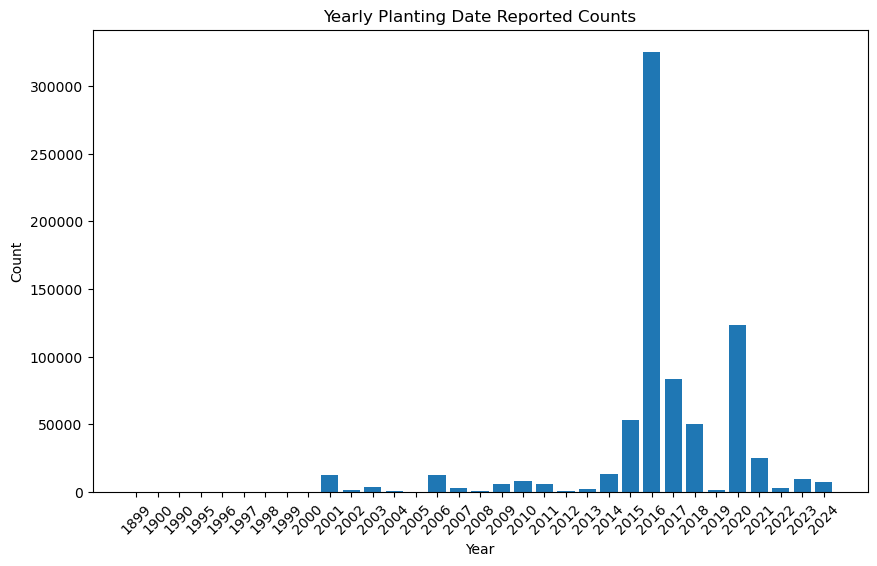

In [133]:
import matplotlib.pyplot as plt



year_counts.sort_index(inplace=True)  

plt.figure(figsize=(10, 6)) 
plt.bar(year_counts.index.astype(str), year_counts.values)  
plt.xlabel('Year')  
plt.ylabel('Count') 
plt.title('Yearly Planting Date Reported Counts')  
plt.xticks(rotation=45)  
plt.show() 

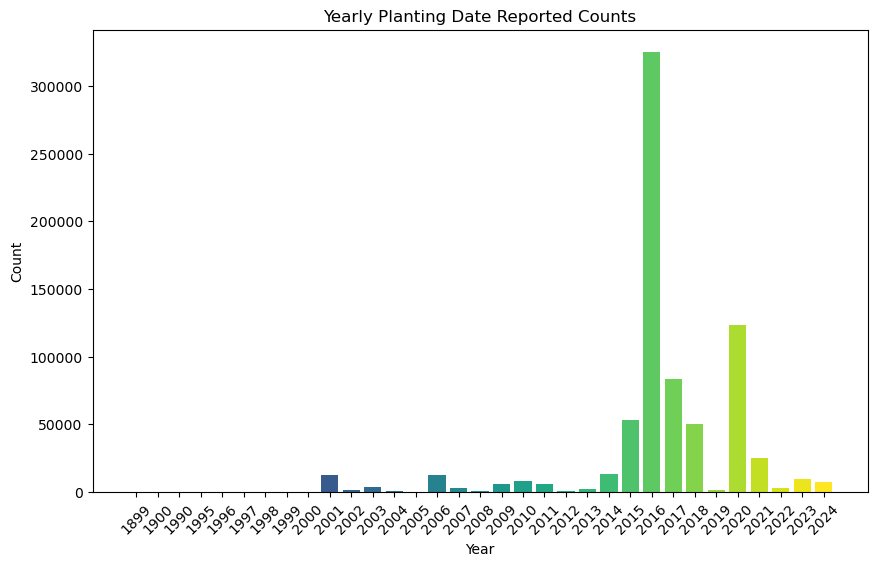

In [134]:
import matplotlib.pyplot as plt
import numpy as np

year_counts.sort_index(inplace=True)  


colors = plt.cm.viridis(np.linspace(0, 1, len(year_counts)))

plt.figure(figsize=(10, 6)) 
plt.bar(year_counts.index.astype(str), year_counts.values, color=colors)  
plt.xlabel('Year')  
plt.ylabel('Count')  
plt.title('Yearly Planting Date Reported Counts')  
plt.xticks(rotation=45) 
plt.show()  